## Tables Of Contents
1. [Append and concatenate](#app) 
    - [Append](#append)
    - [Concatenate](#concat)
2. [Joining Tables (Inner, Outer, Left, and Rights)](#tjoins)
    - [Inner Joins](#inner)
    - [Outer Joins](#outer)
    - [Left Joins](#left)
    - [Right Joins](#right)
3. [Working With Text Data](#text)
    - [Lowercasing text](#Ltext)
    - [Removing punctuation](#remove)

![Image](https://files.realpython.com/media/Merging-Joining-and-Concatenating-in-Pandas_Watermarked_1.e45698a508a4.jpg)  
- **Joining** and **merging DataFrames** is the core process to start with **data analysis** and **machine learning** tasks. 
- It is one of the toolkits which every Data Analyst or Data Scientist should master because in almost all the cases **data comes from multiple source and files**.

# 1.Append and concatenate<a class = 'anchor' id = 'app'></a>
## Append <a class = 'anchor' id = 'append'></a>
The `append()` function in Pandas is used to append one DataFrame to another.
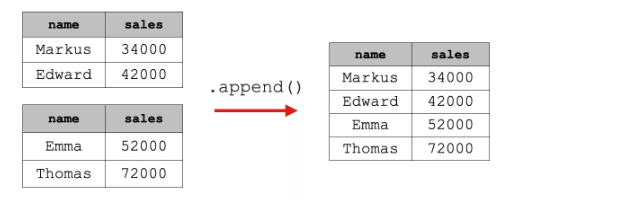

In [1]:
import pandas as pd

# Create the two dataframes df1 and df2 

df1 = pd.DataFrame({"name" : ["Markus", "Edward"], 
                    "sales" : [34000,42000]} )

df2 = pd.DataFrame({"name" : ["Emma", "Thomas"], 
                    "sales" : [52000,72000]})

# display first dataframe
df1
                    

,name,sales
0,Markus,34000
1,Edward,42000


In [2]:
# second data frame
df2

,name,sales
0,Emma,52000
1,Thomas,72000


In [3]:
# now let's join the dataframes
# Append the DataFrames vertically
appended_df = df1.append(df2,ignore_index = True)   # ignore index = True will ignore past index value

appended_df

C:\Users\Shubham Soni\AppData\Local\Temp\ipykernel_16308\3333668805.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_df = df1.append(df2,ignore_index = True)   # ignore index = True will ignore past index value


,name,sales
0,Markus,34000
1,Edward,42000
2,Emma,52000
3,Thomas,72000


Here, we created two DataFrames `df1` and `df2`. We then append `df2` to `df1` using the `append()` function, which **adds** the **rows of df2 to the bottom of df1**.

## Contcatenate <a class = 'anchor' id = 'concat'></a>
The **`concat()`** function in Pandas is used to concatenate two or more DataFrames together.

In [4]:
# Concatenate the DataFrames vertically
concatenated_df = pd.concat([df1, df2], axis = 0, ignore_index = True) # ignore_index  = True , will ignore past index values
concatenated_df

,name,sales
0,Markus,34000
1,Edward,42000
2,Emma,52000
3,Thomas,72000


In [5]:
# Concatenate the DataFrames Horizentally
concatenated_df = pd.concat([df1, df2], axis = 1)
concatenated_df

,name,sales,name,sales
0,Markus,34000,Emma,52000
1,Edward,42000,Thomas,72000


## 2.Tables Joins  <a class = 'anchor' id = 'tjoins'></a>   

## Joining Tables (Inner, Outer, Left, and Right) <a class = 'anchor' id = tjoins></a>
- Joining tables is a fundamental operation in data analysis and database management.
- It allows us to combine data from multiple sources to gain comprehensive insights and make informed decisions.
- This is particularly relevant in various industries such as **finance, e-commerce, healthcare**, and **government sectors**, where data integration and analysis are crucial.
![Image](https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png?ezimgfmt=ng:webp/ngcb1)

Employee Data

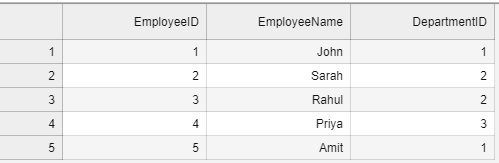

Department Data

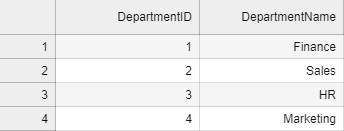

In [6]:
# Create the Employees and Departments DataFrames
employees = pd.read_csv('dataset/Employees.csv',sep = '|')

departments = pd.read_csv('dataset/Departmeents.csv',sep = '|')


In [7]:
employees

,EmployeeID,EmployeeName,DepartmentID
0,1,John,1
1,2,Sarah,2
2,3,Rahul,2
3,4,Priya,3
4,5,Amit,1


In [8]:
departments

,DepartmentID,DepartmentName
0,1,Finance
1,2,Sales
2,3,HR
3,4,Marketing


### Inner Join <a class = 'anchor' id = inner ></a>
- An inner join returns only the matching records from both tables based on a common key.
- In Pandas, we can perform an inner join using the merge() function with the how='inner' parameter.


In [9]:
# Perform the Inner Join
inner_join = pd.merge(employees, departments, on='DepartmentID', how='inner')
inner_join

,EmployeeID,EmployeeName,DepartmentID,DepartmentName
0,1,John,1,Finance
1,5,Amit,1,Finance
2,2,Sarah,2,Sales
3,3,Rahul,2,Sales
4,4,Priya,3,HR


### Outer Join <a class = 'anchor' id = outer></a>
- An outer join returns all the records from both tables, including unmatched records. For the unmatched records, it fills the missing values with `NaN`.
- In Pandas, we can perform an outer join using the `merge()` function with the `how='outer'` parameter.

In [10]:
# Perform the Outer Join
outer_join = pd.merge(employees, departments, on='DepartmentID', how='outer')
outer_join

,EmployeeID,EmployeeName,DepartmentID,DepartmentName
0,1.0,John,1,Finance
1,5.0,Amit,1,Finance
2,2.0,Sarah,2,Sales
3,3.0,Rahul,2,Sales
4,4.0,Priya,3,HR
5,NaN,NaN,4,Marketing


### Left Join <a class = 'anchor' id = left ></a>
- A left join returns all the records from the left (first) table and the matching records from the right (second) table. If there are no matches, it fills the missing values with `NaN`.
- In Pandas, we can perform a left join using the `merge()` function with the `how='left'` parameter.

In [11]:
# Perform the Left Join
left_join = pd.merge(employees, departments, on='DepartmentID', how='left')
left_join

,EmployeeID,EmployeeName,DepartmentID,DepartmentName
0,1,John,1,Finance
1,2,Sarah,2,Sales
2,3,Rahul,2,Sales
3,4,Priya,3,HR
4,5,Amit,1,Finance


### Right Join <a class = 'anchor' id = right ></a>

- A right join returns all the records from the right (second) table and the matching records from the left (first) table. If there are no matches, it fills the missing values with `NaN`.
- In Pandas, we can perform a right join using the `merge()` function with the `how='right'` parameter.

In [12]:
# Perform the Right Join
right_join = pd.merge(employees, departments, on='DepartmentID', how='right')
right_join

,EmployeeID,EmployeeName,DepartmentID,DepartmentName
0,1.0,John,1,Finance
1,5.0,Amit,1,Finance
2,2.0,Sarah,2,Sales
3,3.0,Rahul,2,Sales
4,4.0,Priya,3,HR
5,NaN,NaN,4,Marketing


These examples demonstrate how the different join operations work using sample datasets in the Indian context. The same principles and techniques can be applied to real-world scenarios for data analysis and decision-making.

## Working With Text Data  <a class = 'anchor' id = text ></a>
- Text data in particular can be extremely messy and difficult to work with because it can contain all sorts of characters and symbols that may have little meaning for your analysis. This lesson will cover some basic techniques and functions for working with text data in Python.
- Cleaning text data is an important step in any data analysis or machine learning project.
- Text data can contain various inconsistencies, such as capitalization, spelling mistakes, punctuation, special characters, and more. 
- We will explore how to clean text data inside a pandas DataFrame using Python.


The `.str` is an attribute in pandas that provides access to a set of string methods for operating on string data within a column. When we have a column containing string data in a pandas DataFrame, you can use the `.str` attribute to apply various string operations and methods to manipulate and analyze the string values within that column.  

- **`len()`**: Calculates the length of each string.
- **`lower()`**: Converts each string to lowercase.
- **`upper()`**: Converts each string to uppercase.
- **`contains()`**: Checks if each string contains a specific substring.
- **`replace()`**: Replaces specific substrings within each string.
- **`split()`**: Splits each string into a list based on a specified delimiter.
- **`strip()`**: Removes leading and trailing whitespace from each string. and etc

In [16]:
import pandas as pd
data = {'text': ['This is a sample sentence.',
                 '    This is another sentence with white spaces !  ',
                 'This is a third sentence with numbers 1234 and another numbers 343324.',
                 'This is the 4th sentence, with punctuation?',
                 'This is a 5th sentence with special characters #%^!',
                '   This is 6th sentence with extra white spaces      ']}
df = pd.DataFrame(data)
df

,text
0,This is a sample sentence.
1,This is another sentence with white spaces...
2,This is a third sentence with numbers 1234 and...
3,"This is the 4th sentence, with punctuation?"
4,This is a 5th sentence with special characters...
5,This is 6th sentence with extra white space...


### Lowercasing text <a class = 'anchor' id = 'Ltext'></a>
- String functions in pandas **mirror built** in string functions and many have the **same name** as their **singular counterparts**.
- For example, **`str.lower()`** converts a single string to lowercase, while **`series.str.lower()`** converts all the strings in a series to lowercase.
- Lowercasing text is a common step in text cleaning, as it helps in standardizing the text data.
- We can use the **`str.lower()`** method of pandas to convert all the text data in a DataFrame to lowercase.

In [17]:
df['text1'] = df['text'].str.lower()
df

,text,text1
0,This is a sample sentence.,this is a sample sentence.
1,This is another sentence with white spaces...,this is another sentence with white spaces...
2,This is a third sentence with numbers 1234 and...,this is a third sentence with numbers 1234 and...
3,"This is the 4th sentence, with punctuation?","this is the 4th sentence, with punctuation?"
4,This is a 5th sentence with special characters...,this is a 5th sentence with special characters...
5,This is 6th sentence with extra white space...,this is 6th sentence with extra white space...


### Uppercasing text <a class = 'anchor' id = 'Utext'></a>
- Uppercasing text is also a common step in text cleaning, as it helps in standardizing the text data.
- We can use the str.upper() method of pandas to convert all the text data in a DataFrame to Uppercase.

In [18]:
df['text1'] = df['text'].str.upper()
df

,text,text1
0,This is a sample sentence.,THIS IS A SAMPLE SENTENCE.
1,This is another sentence with white spaces...,THIS IS ANOTHER SENTENCE WITH WHITE SPACES...
2,This is a third sentence with numbers 1234 and...,THIS IS A THIRD SENTENCE WITH NUMBERS 1234 AND...
3,"This is the 4th sentence, with punctuation?","THIS IS THE 4TH SENTENCE, WITH PUNCTUATION?"
4,This is a 5th sentence with special characters...,THIS IS A 5TH SENTENCE WITH SPECIAL CHARACTERS...
5,This is 6th sentence with extra white space...,THIS IS 6TH SENTENCE WITH EXTRA WHITE SPACE...


###  Removing punctuation <a class = 'anchor' id = 'remove'></a>
- Punctuation marks such as periods, commas, and semicolons do not add any value to text data analysis. 
- We can remove punctuation using the `str.replace()`method of pandas and regular expressions.

In [19]:
df['text2'] = df['text'].str.replace('[^\w\s]', '')
df

C:\Users\Shubham Soni\AppData\Local\Temp\ipykernel_16308\1663136929.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text2'] = df['text'].str.replace('[^\w\s]', '')


,text,text1,text2
0,This is a sample sentence.,THIS IS A SAMPLE SENTENCE.,This is a sample sentence
1,This is another sentence with white spaces...,THIS IS ANOTHER SENTENCE WITH WHITE SPACES...,This is another sentence with white spaces
2,This is a third sentence with numbers 1234 and...,THIS IS A THIRD SENTENCE WITH NUMBERS 1234 AND...,This is a third sentence with numbers 1234 and...
3,"This is the 4th sentence, with punctuation?","THIS IS THE 4TH SENTENCE, WITH PUNCTUATION?",This is the 4th sentence with punctuation
4,This is a 5th sentence with special characters...,THIS IS A 5TH SENTENCE WITH SPECIAL CHARACTERS...,This is a 5th sentence with special characters
5,This is 6th sentence with extra white space...,THIS IS 6TH SENTENCE WITH EXTRA WHITE SPACE...,This is 6th sentence with extra white space...


### Number of characters in  text


In [22]:
df['Number_of_characters'] = df['text'].str.len()
df

,text,text1,text2,text3,text4,Number_of_characters
0,This is a sample sentence.,THIS IS A SAMPLE SENTENCE.,This is a sample sentence,This is a sample sentence.,This is a sample sentence.,26
1,This is another sentence with white spaces...,THIS IS ANOTHER SENTENCE WITH WHITE SPACES...,This is another sentence with white spaces,This is another sentence with white spaces...,This is another sentence with white spaces !,50
2,This is a third sentence with numbers 1234 and...,THIS IS A THIRD SENTENCE WITH NUMBERS 1234 AND...,This is a third sentence with numbers 1234 and...,This is a third sentence with numbers and ano...,This is a third sentence with numbers 1234 and...,70
3,"This is the 4th sentence, with punctuation?","THIS IS THE 4TH SENTENCE, WITH PUNCTUATION?",This is the 4th sentence with punctuation,"This is the th sentence, with punctuation?","This is the 4th sentence, with punctuation?",43
4,This is a 5th sentence with special characters...,THIS IS A 5TH SENTENCE WITH SPECIAL CHARACTERS...,This is a 5th sentence with special characters,This is a th sentence with special characters ...,This is a 5th sentence with special characters...,51
5,This is 6th sentence with extra white space...,THIS IS 6TH SENTENCE WITH EXTRA WHITE SPACE...,This is 6th sentence with extra white space...,This is th sentence with extra white spaces...,This is 6th sentence with extra white spaces,53


### Number of words

In [23]:
# df['text'].apply(lambda x : len(x.split()))   ##you can  also use this method
df['Number_of_words'] = df['text'].str.split().str.len()
df

,text,text1,text2,text3,text4,Number_of_characters,Number_of_words
0,This is a sample sentence.,THIS IS A SAMPLE SENTENCE.,This is a sample sentence,This is a sample sentence.,This is a sample sentence.,26,5
1,This is another sentence with white spaces...,THIS IS ANOTHER SENTENCE WITH WHITE SPACES...,This is another sentence with white spaces,This is another sentence with white spaces...,This is another sentence with white spaces !,50,8
2,This is a third sentence with numbers 1234 and...,THIS IS A THIRD SENTENCE WITH NUMBERS 1234 AND...,This is a third sentence with numbers 1234 and...,This is a third sentence with numbers and ano...,This is a third sentence with numbers 1234 and...,70,12
3,"This is the 4th sentence, with punctuation?","THIS IS THE 4TH SENTENCE, WITH PUNCTUATION?",This is the 4th sentence with punctuation,"This is the th sentence, with punctuation?","This is the 4th sentence, with punctuation?",43,7
4,This is a 5th sentence with special characters...,THIS IS A 5TH SENTENCE WITH SPECIAL CHARACTERS...,This is a 5th sentence with special characters,This is a th sentence with special characters ...,This is a 5th sentence with special characters...,51,9
5,This is 6th sentence with extra white space...,THIS IS 6TH SENTENCE WITH EXTRA WHITE SPACE...,This is 6th sentence with extra white space...,This is th sentence with extra white spaces...,This is 6th sentence with extra white spaces,53,8


### Combine all strings
We can combine all the strings in a series together into a single string with **`series.str.cat()`**.

In [24]:
text = df['text'].str.cat()
text

'This is a sample sentence.    This is another sentence with white spaces !  This is a third sentence with numbers 1234 and another numbers 343324.This is the 4th sentence, with punctuation?This is a 5th sentence with special characters #%^!   This is 6th sentence with extra white spaces      '

In [25]:
type(text)

str

# Micro-Project

### Q. As a Data Scientist working for ABC Corporation, you are tasked with developing a data processing program to extract and categorize specific information from a given  text, which contains an email address associated with a newly onboarded employee. 

The company follows a standardized format for creating email IDs, comprising the following components:
  
  

`"first_name" + "." + "last_name" + "employee_id" + "@gmail.com"`.

#### Your objective is to create a data processing program that can extract and organize the following data from the email address:
- First name
- Last name
- Employee ID
- Company domain

**Sample Input:**  

The email address of the recently hired data scientist is `maria.peter123@datasciencecorp.com`.

**Sample Output:**
- First name: maria
- Last name: peter
- Employee ID: 123
- Company domain: datasciencecorp

Your program should be able to extract and display this information accurately for any given email address following the same format.

In [ ]:
import re

text = 'The email id of the newly joined employee is rahul.khanna85@hv.com'

pattern = r'(\w+)\.([a-zA-Z]+)(\d+)@(\w+)\.com'

result = re.search(pattern, text)
email = result.group(0)
first_name = result.group(1)
last_name = result.group(2)
emp_id = result.group(3)
company = result.group(4)

print(email)
print(first_name)
print(last_name)
print(emp_id)
print(company)

#### Similary the details of employees is given in form of text.
#### Extract the data from the text in a data frame.  Create a DataFrame containing the details of employees having the columns Email, First_Name, Last_Name,Emp_id, Company

                  'Hi My email id is : john.doe012@example.com',
                  'There comes my email id- emily.smith210@emailprovider.net',
                  'Attaching my official email id as alexander.jones120@mailservice.org',
                  'This is detail for the new employee sarah.brown356@example.org',
                  'samuel.white536@emailco.com is my offical id',
                  'My email id is -- lisa.jones258@emailcompany.net ',
                  'Following is the email id : daniel.miller528@example.net',
                  'Hello Sir, My current email id is: jennifer.wilson471@mailservice.com',
                  'Company email id is michael.clark174@emailprovider.org',
                  'anna.walker369@examplemail.net'

In [ ]:
import pandas as pd
import re

data = {'Text': ['Hi My email id is : john.doe012@example.com',
                  'There comes my email id- emily.smith210@emailprovider.net',
                  'Attaching my official email id as alexander.jones120@mailservice.org',
                  'This is detail for the new employee sarah.brown356@example.org',
                  'samuel.white536@emailco.com is my offical id',
                  'My email id is -- lisa.jones258@emailcompany.net ',
                  'Following is the email id : daniel.miller528@example.net',
                  'Hello Sir, My current email id is: jennifer.wilson471@mailservice.com',
                  'Company email id is michael.clark174@emailprovider.org',
                  'anna.walker369@examplemail.net']}

df = pd.DataFrame(data)

def extract_info(text):
    pattern = r'(\w+)\.([a-zA-Z]+)(\d+)@(\w+)\.(\w+)'
    result = re.search(pattern, text)
    email = result.group(0)
    first_name = result.group(1)
    last_name = result.group(2)
    emp_id = result.group(3)
    company = result.group(4)
    return pd.Series({'Email': email, 'First_Name': first_name, 'Last_Name': last_name, 'Employee_ID': emp_id, 'Company': company})

# Apply the function to the 'Email' column
df[['Email', 'First_Name', 'Last_Name', 'Employee_ID', 'Company']] = df['Text'].apply(extract_info)

# Display the resulting DataFrame
df.head()